# Perceptron Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from feature_engineering import *
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("../data/dataset1.csv")
df.head(-1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [3]:
df_imputed = mean_imputation(df)

In [4]:
df_imputed.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
class Perceptron:
    def __init__(self, lr=0.1, epochs=10):
        self.lr = lr
        self.epochs = epochs
        self.weights = None

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.rand(n_features)

        for _ in range(self.epochs):
            for idx, x_i in X.iterrows():
                y_hat = np.dot(x_i, self.weights)
                update = self.lr * (y[idx] - y_hat)
                self.weights += update * x_i

    def predict(self, X):
        y_hat = np.dot(X, self.weights)
        return np.where(y_hat >= 0, 1, -1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_imputed, shuffle = False)

PM1 = Perceptron(lr=0.001, epochs=100)
PM1.train(X_train, y_train)
y_pred1 = PM1.predict(X_test)

evaluate(y_test, y_pred1)

Confusion Matrix: {'true_positive': 0, 'true_negative': 145, 'false_positive': 0, 'false_negative': 43} %
Accuracy: 77.12765957446808 %
Precision: 0 %
Recall: 0.0%


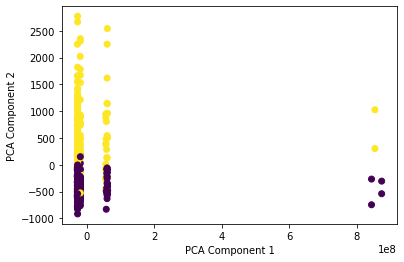

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# plot the first two principal components
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_imputed, shuffle = True)

PM2 = Perceptron(lr=0.001, epochs=1000)
PM2.train(X_train, y_train)
y_pred2 = PM2.predict(X_test)

evaluate(y_test, y_pred2)

Confusion Matrix: {'true_positive': 0, 'true_negative': 112, 'false_positive': 0, 'false_negative': 76} %
Accuracy: 59.57446808510638 %
Precision: 0 %
Recall: 0.0%


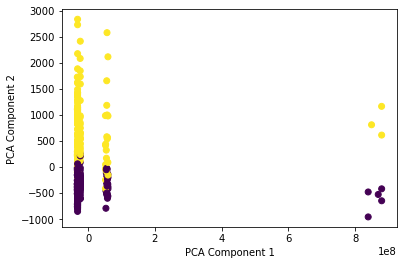

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# plot the first two principal components
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [10]:
df_imputed

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
df_normalized, mean, stddev = normalize(df_imputed)
X_train, X_test, y_train, y_test = train_test_split(df_normalized)

PM3 = Perceptron(lr=0.001, epochs=1000)
PM3.train(X_train, y_train)
y_pred3 = PM3.predict(X_test)

evaluate(y_test, y_pred3)

Confusion Matrix: {'true_positive': 73, 'true_negative': 105, 'false_positive': 7, 'false_negative': 3} %
Accuracy: 94.68085106382979 %
Precision: 91.25 %
Recall: 96.05263157894737%


In [12]:
y_train

204   -1
70     1
131    1
431   -1
540   -1
      ..
437   -1
258    1
232   -1
115   -1
120   -1
Name: diagnosis, Length: 381, dtype: int64

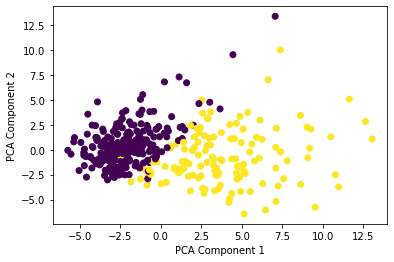

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# plot the first two principal components
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [17]:
df_shuffled = df_imputed.sample(frac=1, axis=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df_shuffled)

PM4 = Perceptron(lr=0.001, epochs=1000)
PM4.train(X_train, y_train)
y_pred4 = PM4.predict(X_test)

evaluate(y_test, y_pred4)

Confusion Matrix: {'true_positive': 0, 'true_negative': 112, 'false_positive': 0, 'false_negative': 76} %
Accuracy: 59.57446808510638 %
Precision: 0 %
Recall: 0.0%


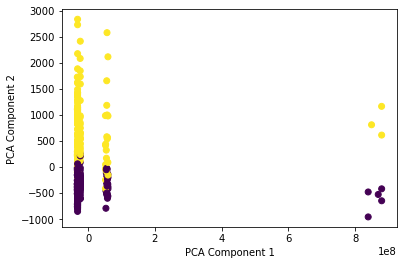

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# plot the first two principal components
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()